In [1]:
from sklearn.metrics import confusion_matrix
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
from math import ceil
import shutil

def fnr_img(filename, min_fn_num, saveimg, folder):
    def result(data_o, min_fn_num):
        data=data_o.copy()
        data = data.sort_values("y_pred")
        divide = np.array(data[data["y_true"] == 1]["y_pred"].sort_values())[max(min_fn_num, 0)] 
        print(divide)
        data = data.sort_values("y_pred", ascending = 1)
        data.loc[data['y_pred'] >= divide, 'y_pred'] = 1
        data.loc[data['y_pred'] < divide, 'y_pred'] = 0
        table=confusion_matrix(data['y_true'], data['y_pred'])
   
        fpr = table[0][1] / float(table[0][1] + table[0][0])
        fnr = table[1][0] / float(table[1][0] + table[1][1])
        
        png_name = data.loc[data['y_true']==1].loc[data['y_pred'] ==0, 'png_name']

        if png_name.shape[0]==0:
            return (fnr, fpr, 0, divide, 0)
        
        img_list = png_name.str.split('/',expand=True).iloc[:,-1].tolist()
        y_pred = list(data_o["y_pred"][data_o["png_name"].str.split('/',expand=True).iloc[:,-1].isin(img_list)])
        y_pred.sort()
        
        return (fnr, fpr, img_list, divide, y_pred)
    data = pd.read_csv(filename, delimiter=',',
                       header=0)
    
    
    fnr, fpr, img, thres, y_pred = result(data, min_fn_num)

    if img == 0:
        return {"fnr":0,"fpr":fpr, "threshold":thres}

    for i,file in enumerate(img):
        img[i]= np.array(Image.open(os.path.join(folder,file)))
    
    img = np.array(img)
    nimg=len(img)
    nrows=int(ceil(float(nimg)/5))
    print(nimg)
    print(nrows)
    fig, axes = plt.subplots(nrows=nrows, ncols=5, sharex=True, sharey=True, figsize=(5*2,nrows*2))

    if nrows==1:
        for c, ax in zip(np.arange(5), axes):
            nth=c
            if nth < nimg:
                ax.imshow(img[nth])
                ax.title.set_text(str(round(y_pred[nth], 3)))
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)
            ax.set_axis_off()
    else:
        for r, row in zip(np.arange(nrows), axes):
            for c, ax in zip(np.arange(5), row):
                nth=r*5+c
                if nth < nimg:
                    ax.imshow(img[nth])
                    ax.title.set_text(str(round(y_pred[nth], 3)))
                    ax.get_xaxis().set_visible(False)
                    ax.get_yaxis().set_visible(False)
                ax.set_axis_off()
    
    fig.tight_layout(pad=0)
    if saveimg:
        plt.savefig("row.png", dpi = 700)
    plt.show()
    return {"fnr":fnr,"fpr":fpr, "threshold":thres}

fp by thres: 0.001 -- 6.00620567376%
fn by thres: 0.001 -- 0.0%
0.32188564539
10
2


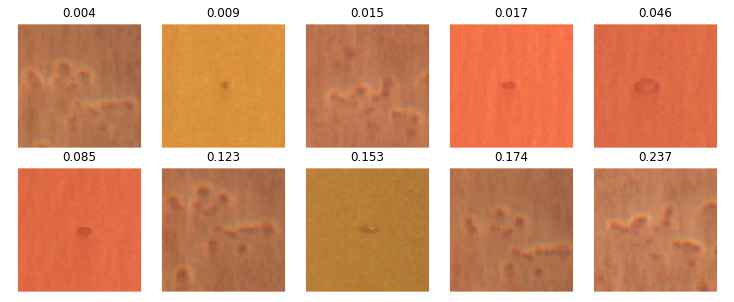

{'fnr': 0.010235414534288639,
 'fpr': 0.0029463913224864412,
 'threshold': 0.32188564538955688}

In [6]:
f = "/home/seanyu/project/CCP/res_csv/testing_hard_negative_thresh10_gen3_k3.csv"
thres = 0.001
df = pd.read_csv(f)
print('fp by thres: ' + str(thres) + ' -- ' + str(np.sum(df[df['y_true'] == 0]['y_pred'] >= thres) / len(df[df['y_true'] == 0]) * 100 ) + '%')
print('fn by thres: ' + str(thres) + ' -- ' + str(np.sum(df[df['y_true'] == 1]['y_pred'] < thres) / len(df[df['y_true'] == 1]) * 100 ) + '%' )

fnr_img(filename= f,
        min_fn_num= 10,
        folder="/data/put_data/seanyu/ccp/clean_date_cut/thres10/copper_test/",
        saveimg= False
        )

In [5]:
5000 / 300000

0.016666666666666666

fp by thres: 0.01 -- 0.021314889942
fn by thres: 0.01 -- 0.00105152471083
0.156935527921
10
2


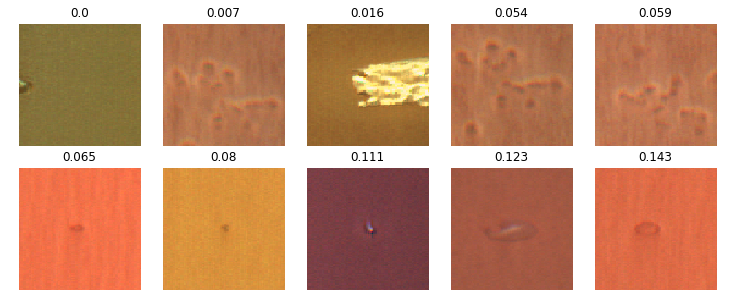

{'fnr': 0.0052576235541535229,
 'fpr': 0.0069598159531464318,
 'threshold': 0.15693552792072296}

In [186]:
f = "/home/seanyu/project/CCP/res_csv/testing_resnetMean_DateCut20_revised0807_k2.csv"
thres = 0.01
df = pd.read_csv(f)
print('fp by thres: ' + str(thres) + ' -- ' + str(np.sum(df[df['y_true'] == 0]['y_pred'] >= thres) / len(df[df['y_true'] == 0]) ))
print('fn by thres: ' + str(thres) + ' -- ' + str(np.sum(df[df['y_true'] == 1]['y_pred'] < thres) / len(df[df['y_true'] == 1])))

fnr_img(filename= f,
        min_fn_num= 10,
        folder="/data/put_data/seanyu/ccp/clean_date_cut/thres20/copper_test/",
        saveimg= False
        )

fp by thres: 0.01 -- 0.0153493334107
fn by thres: 0.01 -- 0.000525762355415
0.48537582159
10
2


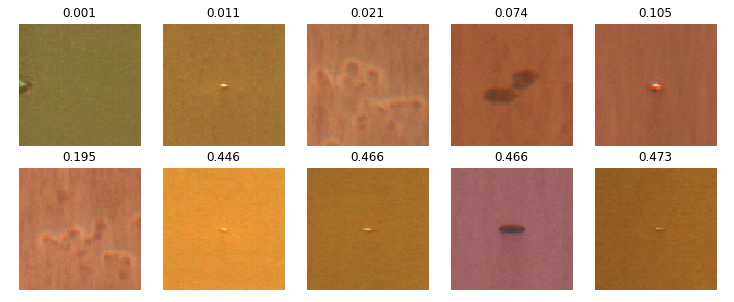

{'fnr': 0.0052576235541535229,
 'fpr': 0.004013324527726775,
 'threshold': 0.48537582159042358}

In [187]:
f = "/home/seanyu/project/CCP/res_csv/testing_resnetMean_DateCut20_revised0807_k3.csv"
thres = 0.01
df = pd.read_csv(f)
print('fp by thres: ' + str(thres) + ' -- ' + str(np.sum(df[df['y_true'] == 0]['y_pred'] >= thres) / len(df[df['y_true'] == 0]) ))
print('fn by thres: ' + str(thres) + ' -- ' + str(np.sum(df[df['y_true'] == 1]['y_pred'] < thres) / len(df[df['y_true'] == 1])))

fnr_img(filename= f,
        min_fn_num= 10,
        folder="/data/put_data/seanyu/ccp/clean_date_cut/thres20/copper_test/",
        saveimg= False
        )

fp by thres: 0.01 -- 0.0107336473355
fn by thres: 0.01 -- 0.00105152471083
0.472649037838
10
2


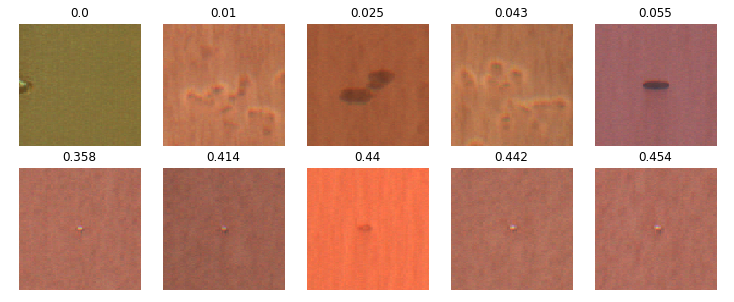

{'fnr': 0.0052576235541535229,
 'fpr': 0.0030916387862777684,
 'threshold': 0.47264903783798218}

In [257]:
f = "/home/seanyu/project/CCP/res_csv/testing_resnetMean_DateCut20_revised0807_k4.csv"
thres = 0.01
df = pd.read_csv(f)
print('fp by thres: ' + str(thres) + ' -- ' + str(np.sum(df[df['y_true'] == 0]['y_pred'] >= thres) / len(df[df['y_true'] == 0]) ))
print('fn by thres: ' + str(thres) + ' -- ' + str(np.sum(df[df['y_true'] == 1]['y_pred'] < thres) / len(df[df['y_true'] == 1])))

fnr_img(filename= f,
        min_fn_num= 10,
        folder="/data/put_data/seanyu/ccp/clean_date_cut/thres20/copper_test/",
        saveimg= False
        )

In [93]:
df = pd.read_csv("/home/seanyu/project/CCP/res_csv/testing_resnetMean_DateCut20_revised0807_k3.csv")

In [145]:
p = df[df['y_true'] == 1]
p = p.sort_values(by='y_pred', ascending=True)
print(p[0:10].png_name)
px = list(p[0:10].png_name)

q = df[df['y_true'] == 0]
q = q.sort_values(by = 'y_pred', ascending = False)
print(q[0:10].png_name)
qx = list(q[-500:].png_name)

138322    /data/put_data/seanyu/ccp/clean_date_cut/thres...
139208    /data/put_data/seanyu/ccp/clean_date_cut/thres...
138908    /data/put_data/seanyu/ccp/clean_date_cut/thres...
139248    /data/put_data/seanyu/ccp/clean_date_cut/thres...
139577    /data/put_data/seanyu/ccp/clean_date_cut/thres...
138572    /data/put_data/seanyu/ccp/clean_date_cut/thres...
139087    /data/put_data/seanyu/ccp/clean_date_cut/thres...
139176    /data/put_data/seanyu/ccp/clean_date_cut/thres...
139398    /data/put_data/seanyu/ccp/clean_date_cut/thres...
138282    /data/put_data/seanyu/ccp/clean_date_cut/thres...
Name: png_name, dtype: object
41008     /data/put_data/seanyu/ccp/clean_date_cut/thres...
87464     /data/put_data/seanyu/ccp/clean_date_cut/thres...
6953      /data/put_data/seanyu/ccp/clean_date_cut/thres...
73962     /data/put_data/seanyu/ccp/clean_date_cut/thres...
103344    /data/put_data/seanyu/ccp/clean_date_cut/thres...
30108     /data/put_data/seanyu/ccp/clean_date_cut/thres...
131559    

In [146]:
for i in px:
    shutil.copyfile(src=i, dst = '/data/put_data/seanyu/ccp/Raw/i_am_test/cop_bad/' + os.path.basename(i))
    
for i in qx:
    shutil.copyfile(src=i, dst = '/data/put_data/seanyu/ccp/Raw/i_am_test/non_cop_bad/' + os.path.basename(i))
    

In [131]:
np.sum(q['y_pred'] > 0.01)

2115

DO Prediction  here

In [99]:
%env CUDA_VISIBLE_DEVICES=4
import csv
import pandas as pd
import numpy as np
import scipy as sp
import argparse
import glob

from PIL import Image
import skimage.io as skio
import scipy

import keras
from keras.models import Model, load_model
from keras.applications.resnet50 import preprocess_input

### function for -training set mean
def self_mean_preproc(im, d_mean):
    im[:,:,:,0] -= d_mean[0]
    im[:,:,:,1] -= d_mean[1]
    im[:,:,:,2] -= d_mean[2]
    im = im[:, :, :, ::-1] # reorder to BGR
    return im

### function for unifying image load
def op_img(x):
    X_ = np.array([ np.array(img_center_crop(Image.open(i), target_size=(100, 100)), dtype='float32') for i in x] )
    X_ = np.array([scipy.misc.imresize(i, size=(200, 200)) for i in X_]) # add this line to resize images
    X_ = X_.reshape((len(X_), 200, 200, 3))
    return X_

def img_center_crop(img, target_size):
    # return center cropprd image (not resizing)
    # img should be a PIL image object
    # target size should be a tuple, eg (224, 224)
    width, height = img.size
    if width == target_size[0] and height == target_size[1]:
        return img
    left = (width - target_size[0])/2
    right = (width + target_size[0])/2
    top = (height - target_size[1])/2
    bottom = (height + target_size[1])/2
    
    new_img = img.crop((left, top, right, bottom))
    return new_img

def im_preCrop_90(img):
    im = Image.open(img)
    im_out = im.crop((5, 5, 95, 95))
    im_out = im.resize((100, 100))
    return im_out

def self_im_preproc(img, do_it = False):
    if do_it:
        im_self_mean = img.mean(axis = (0,1))
        im_out = img - im_self_mean
    else:
        im_out = img
        
    return im_out

env: CUDA_VISIBLE_DEVICES=4


In [91]:
model = load_model("/home/seanyu/project/CCP/model/model_resnetMean_DateCut20_revised0807_k3.h5")

In [96]:
im = Image.open("/data/put_data/seanyu/ccp/Raw/" + '274033817_666981.png')
im = img_center_crop(im, (50, 50)).resize((200, 200), Image.BILINEAR)
im = np.array(im, dtype= 'float32')
im = np.expand_dims(a=im, axis=0)
im = preprocess_input(im)
#im

In [109]:
im_ori = Image.open("/data/put_data/seanyu/ccp/Raw/" + '274033817_666981.png')
im_ori = np.array(im_ori)
im_ori = scipy.misc.imresize(im_ori, size=(200, 200))
im_ori = np.expand_dims(a = im_ori, axis = 0)
im_ori = im_ori.astype('float32')
im_ori = preprocess_input(im_ori)

#im_ori = im_ori.resize((200,200), Image.BILINEAR)
#im_ori = np.array(im_ori, dtype = 'float32')
#im_ori = np.expand_dims(a = im_ori, axis = 0)
#im_ori = preprocess_input(im_ori)
#im_ori

In [110]:
#model.predict()
a = model.predict(im)
b = model.predict(im_ori)
print(a)
print(b)

[[ 0.98192167  0.01807831]]
[[ 0.99897397  0.00102601]]


Test

In [249]:
d_img = '/data/put_data/seanyu/ccp/tsne_test/images/'
img_path = glob.glob(d_img + "/*.png")
total_cnts = len(img_path)
total_run = int(np.ceil(total_cnts / 10000.0)) # ceil (how many parts can we split)
dataset_mean = None

In [250]:
model = load_model("/home/seanyu/project/CCP/model/model_resnetMean_DateCut20_revised0807_k3.h5")
#model = Model(inputs = [model.input], outputs = [model.get_layer('global_average_pooling2d_2').output])
y_pred = list()
for ind in np.arange(total_run):
    ind = int(ind)
    print('runing index: ' + str(ind) )
    imgs = op_img(img_path[ind * 10000 : (ind + 1) * 10000 ])
    #imgs = np.array([ np.array(Image.open(i).resize((200, 200), Image.BILINEAR )) for i in img_path[ind * 10000 : (ind + 1) * 10000 ] ])
    imgs = imgs.astype('float32')
    if dataset_mean is None:
        imgs = preprocess_input(imgs)
    else:
        # use loaded dataset mean to do the proc
        imgs = self_mean_preproc(imgs, dataset_mean)

    keeper = model.predict(imgs)
    keeper = list(keeper[:, 1:])
    y_pred.extend(keeper)
    tag = True

runing index: 0


In [256]:
#np.array(y_pred)
#pd.DataFrame({'y_pred': y_pred })
#a = pd.DataFrame({'png_name': img_path})
#b = pd.DataFrame(y_pred)
#pd.concat([a,b])
#pd.concat([a,b], axis = 1)
#pd.DataFrame({'png_name': img_path, 'y_pred': np.squeeze(y_pred)})
np.squeeze(y_pred, axis = 0)

array([ 0.97469646,  0.99997747,  0.99999809, ...,  0.99999094,
        0.99964118,  0.99985182], dtype=float32)

Unsemble

In [ ]:
def simple_ensumble_result(res_to_en, img_dir):
    # res_to_en: list of result csv file
    # img_dir: where are your images (to append it back)
    frame = pd.DataFrame()
    _list = []
    for _files in res_to_en:
        df = pd.read_csv(_files, index_col=None)
        _list.append(df)
    frame = pd.concat(_list)
    
    # build pid
    frame['pid'] = frame['png_name'].apply(os.path.basename)
    
    # do the mean to ensumble
    out = frame.groupby(['pid']).mean()
    
    # append the img folder back
    out['png_name'] = img_dir + '/' + out.index
    out = out.reset_index(drop = True)
    
    return out

In [ ]:
f1 = pd.read_csv("/home/gtx980/Desktop/CCP/Results/0719/testing_DateCut20_fc64_innDrp0.1_k1.csv")
f2 = pd.read_csv("/home/gtx980/Desktop/CCP/Results/0719/testing_DateCut20_fc64_innDrp0.1_k2.csv")
f1['pid'] = f1['png_name'].apply(os.path.basename)
f2['pid'] = f2['png_name'].apply(os.path.basename)
tmp = pd.concat([f1,f2])
#tmp['pid'] = tmp['png_name'].apply(os.path.basename)
xx = tmp.groupby(['pid']).mean()

In [ ]:
csv_list = ["/home/gtx980/Desktop/CCP/Results/0719/testing_DateCut20_fc64_innDrp0.1_k2.csv",
            "/home/gtx980/Desktop/CCP/Results/0719/testing_k1_time_split_with_inconsistent.csv"]
x = simple_ensumble_result(csv_list, img_dir="/home/gtx980/Desktop/CCP/Data/DataSet_3/Clean_Dataset/Copper/")
x.to_csv("ensumble.csv")

In [ ]:
fnr_img(filename= "/home/gtx980/Desktop/CCP/Results/0719/testing_DateCut20_fc64_innDrp0.1_k1.csv",
        min_fn_num= 10,
        folder="/home/gtx980/Desktop/CCP/Data/DataSet_3/Clean_Dataset/Copper/",
        saveimg= False
        )

In [ ]:
fnr_img(filename= "ensumble.csv",
        min_fn_num= 10,
        folder="/home/gtx980/Desktop/CCP/Data/DataSet_3/Clean_Dataset/Copper/",
        saveimg= False
        )

In [15]:
def img_center_crop(img, target_size):
    # return center cropprd image (not resizing)
    # img should be a PIL image object
    # target size should be a tuple, eg (224, 224)
    width, height = img.size
    if width <= target_size[0] and height <= target_size[1]:
        return img
    left = (width - target_size[0])/2
    right = (width + target_size[0])/2
    top = (height - target_size[1])/2
    bottom = (height + target_size[1])/2
    
    new_img = img.crop((left, top, right, bottom))
    return new_img

In [11]:
import glob
iml = glob.glob("/data/put_data/seanyu/ccp/testing_env/RealCopper90/*.png")
im = Image.open(iml[0])

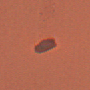

In [16]:
img_center_crop(im, (100,100))